## 导入必要的运行库

In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, skew

In [2]:
train_data = pd.read_csv("./data/train.csv")  # [1460 rows x 81 columns]
test_data = pd.read_csv("./data/test.csv")  # [1459 rows x 80 columns]

In [3]:
train_data.head()   #查看数据集信息

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data['SalePrice'].describe()  #目标列是SalePrice 对其进行分析

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\fuqilingbuxiu\AppData\Local\Temp\ipykernel_6624\664607999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

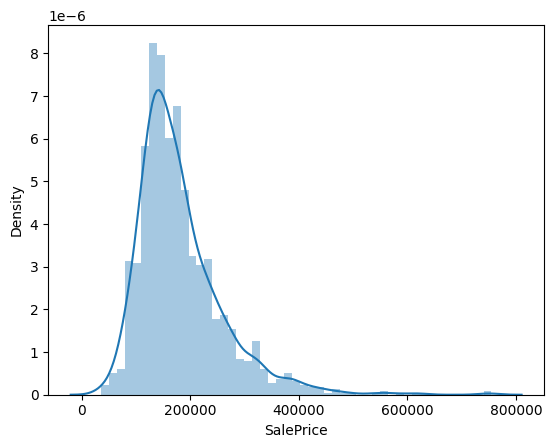

In [5]:
#绘制SalePrice的分布直方图，发现大部分房价集中在较低的价格区间，高价房屋相对较少
sns.distplot(train_data['SalePrice'])

In [6]:
#偏度是衡量数据分布偏斜程度的指标
#峰度是衡量数据分布峰态的指标
print("Skewness: %f" % train_data['SalePrice'].skew())  #偏度
print("Kurtosis: %f" % train_data['SalePrice'].kurt())  #峰度

Skewness: 1.882876
Kurtosis: 6.536282


C:\Users\fuqilingbuxiu\AppData\Local\Temp\ipykernel_6624\986848609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], fit=norm) #绘制出的图像可以看出房价的分布大抵呈正态分布


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

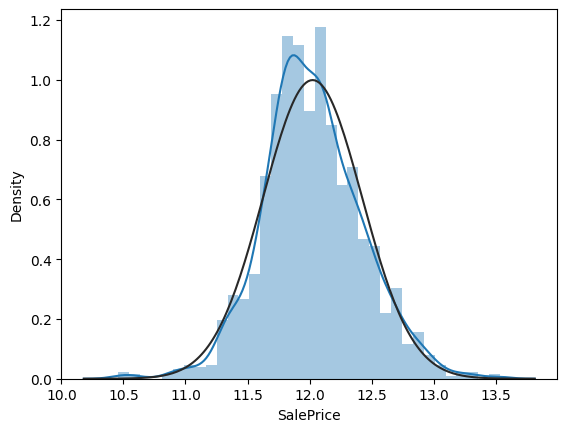

In [7]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice']) #取对数加1是为了更好地拟合模型
sns.distplot(train_data['SalePrice'], fit=norm) #绘制出的图像可以看出房价的分布大抵呈正态分布

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

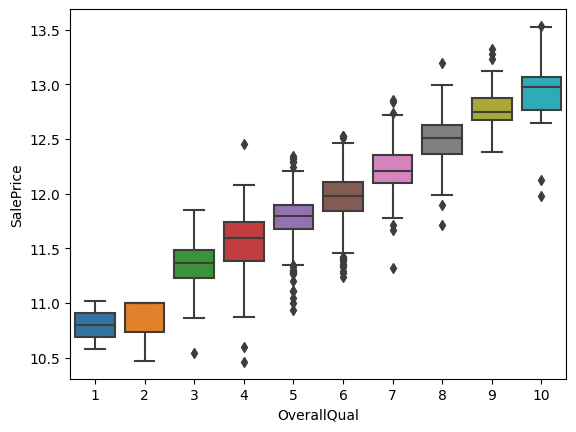

In [8]:
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice')
#x轴表示房屋的整体质量  y轴表示房屋的销售价格
#从图中看出，整体质量越高，销售价格也就越高

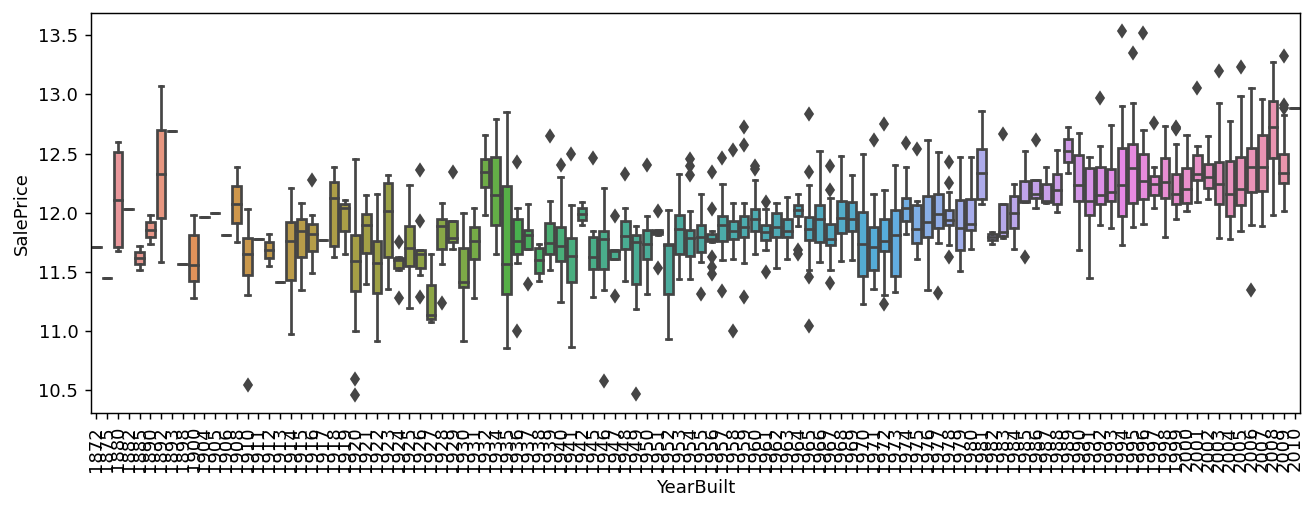

In [9]:
#使用boxplot函数，绘制房屋建造年份与房屋售价之间的关系，发现随着建造年份的增加，房屋售价整体呈现上升趋势
plt.figure(figsize=(12,4),dpi=130)
sns.boxplot(data=train_data, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

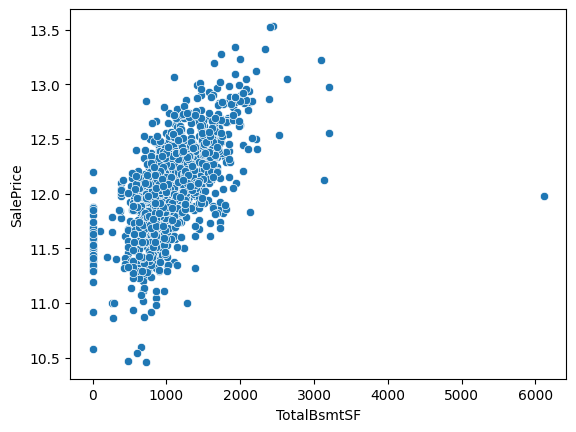

In [10]:
#绘制地下室总面积和房屋售价之间的关系，发现存在一定的正相关性
sns.scatterplot(data=train_data,x='TotalBsmtSF',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

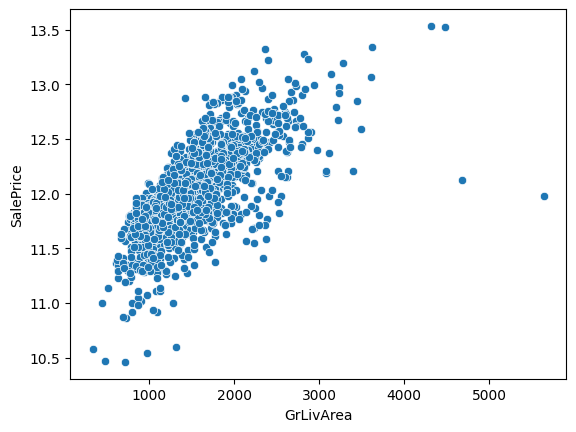

In [11]:
#地面居住面积与房屋售价之间的关系 正相关
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice')

In [12]:
#查看训练集中每个特征与房价之间的相关性，并按照从高到低的顺序排序查看
#train_data.corr()计算了训练数据中的每个特征之间的相关性系数
#[1:]是去除房价自身的相关性系数 可以帮助更好的选择训练时所参考的特征
print(train_data.corr()["SalePrice"].sort_values(ascending=False)[1:])

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


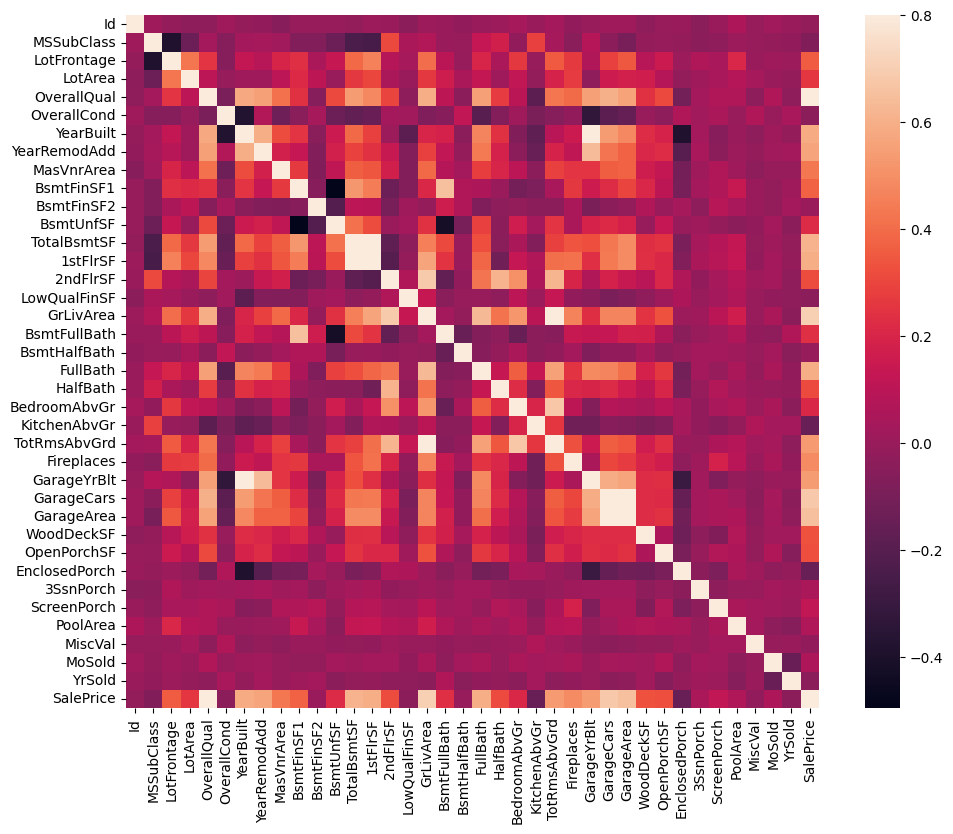

In [13]:
#绘制训练数据中各个特征之间的相关性系数矩阵的热力图，热力图中的颜色越浅则代表两个特征之间的相关性越强，反之，则越弱
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

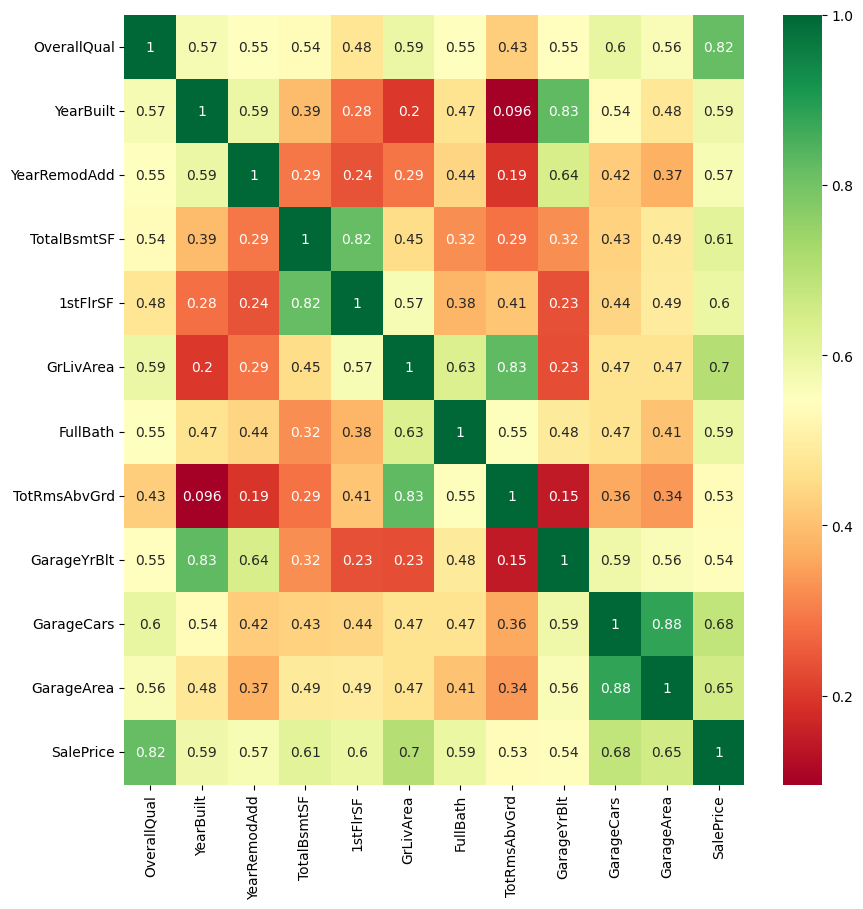

In [14]:
#绘制训练数据中与房价相关系数大于0.5的特征之间的相关性系数矩阵的热力图
corr = train_data.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[highest_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

‘OverQual’ in the top of highest correlation it’s 0.79!

‘GarageCars’ & ‘GarageArea’ like each other (correlation between them is 0.88)

‘TotalBsmtSF’ & ‘1stFlrSF’ also like each other (correlation betwwen them is 0.82), so we can keep either one of them or add the1stFlrSF to the Toltal.

‘TotRmsAbvGrd’ & ‘GrLivArea’ also has a strong correlation (0.83), I decided to keep ‘GrLivArea’ because it’s correlation with ‘SalePrice’ is higher.


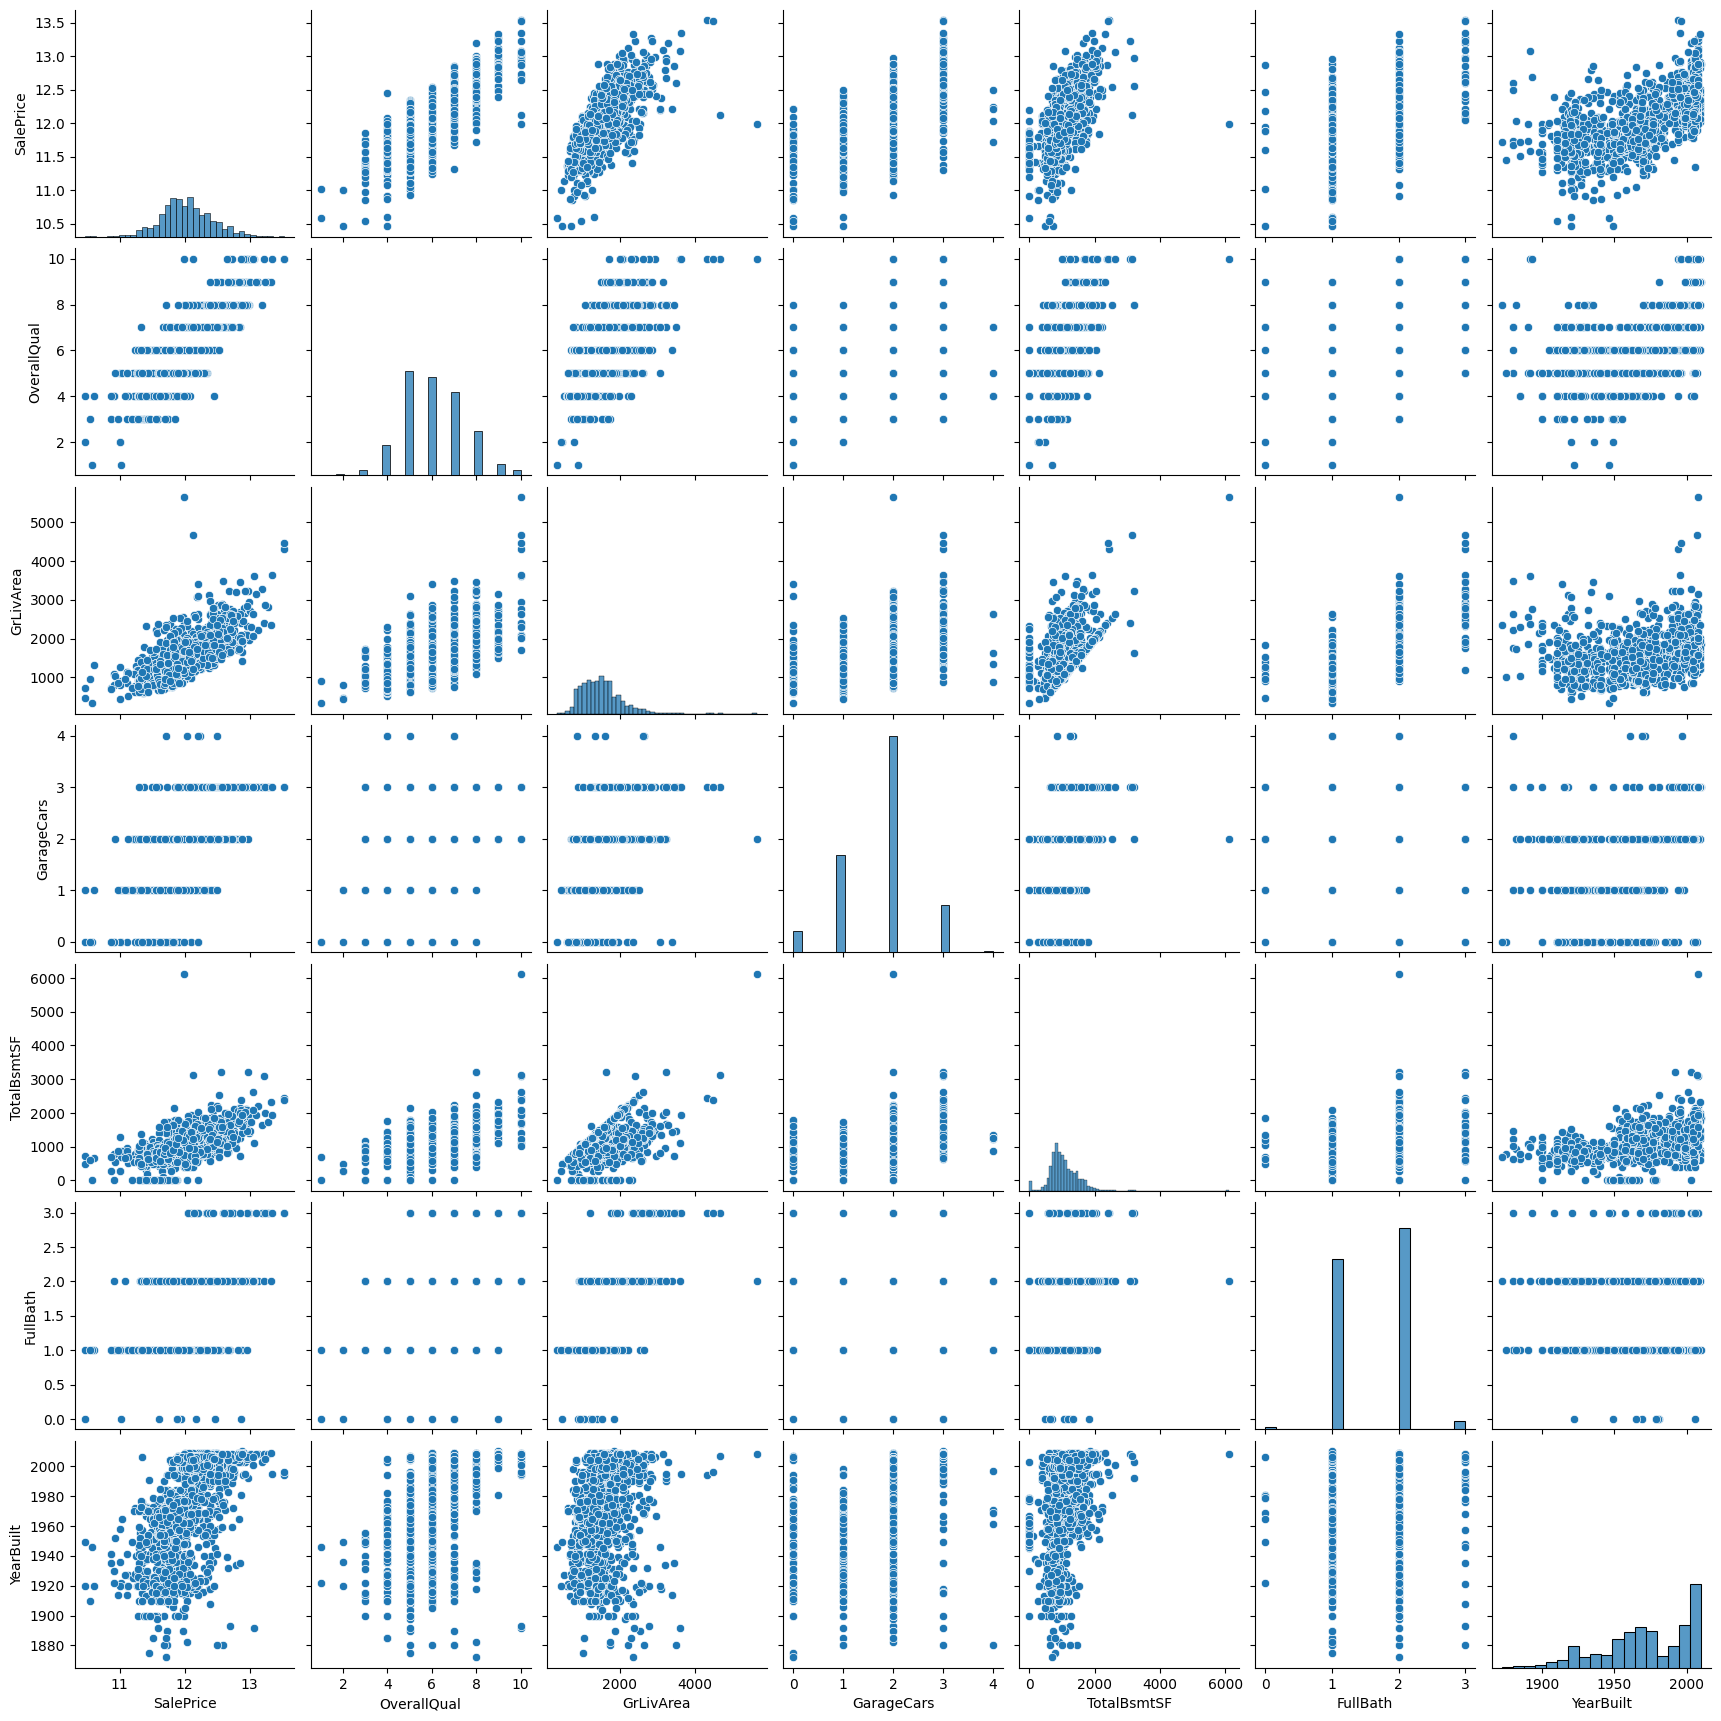

In [15]:
#绘制训练数据中的特征之间的两两关系的散点图 以进行特征工程发现相关性强的特征并提取训练
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols])
plt.show()

In [16]:
#讲训练数据集和测试数据集合并，并删除其中的ID和SalePrice列
y_train = train_data['SalePrice']
test_id = test_data['Id']
all_data = pd.concat([train_data, test_data], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

In [17]:
#检查数据集中每个特征的缺失值数量和缺失值所占的比例，并将他们按照缺失值数量从大到小排序，输出的结果是一个包含缺失值数量和缺失值所占比例的DataFrame
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(25))

              Total    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071
GarageType      157   5.378554
BsmtExposure     82   2.809181
BsmtCond         82   2.809181
BsmtQual         81   2.774923
BsmtFinType2     80   2.740665
BsmtFinType1     79   2.706406
MasVnrType       24   0.822199
MasVnrArea       23   0.787941
MSZoning          4   0.137033
Functional        2   0.068517
BsmtHalfBath      2   0.068517
BsmtFullBath      2   0.068517
Utilities         2   0.068517
SaleType          1   0.034258
BsmtFinSF1        1   0.034258


In [18]:
#删除缺失值数量大于5的特征列
#并打印出剩余特征中的最大缺失值数量
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())

4


In [19]:
#计算数据集中每个特征的缺失值数量，并按照从大到小排序
total = all_data.isnull().sum().sort_values(ascending=False)
total.head(19)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
dtype: int64

In [20]:
#缺失值填充
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [21]:
categorical_missed = ['Exterior1st',
                      'Exterior2nd',
                      'SaleType',
                      'MSZoning',
                      'Electrical',
                      'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

In [22]:
# Fill in the remaining missing values with the values that are most common for this feature.
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [23]:
print(all_data.isnull().sum().max())

2


In [24]:
#计算数据集中数值型特征的偏度，并将偏度绝对值大于0.5的特征筛选出来
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
print(high_skew)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


In [25]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

In [26]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [27]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [28]:
x_train = all_data[:len(y_train)]  # (1460, 219)
x_test = all_data[len(y_train):]  # (1459, 219)

In [29]:
train_features = torch.tensor(x_train.values, dtype=torch.float32)  # torch.Size([1460, 219])
test_features = torch.tensor(x_test.values, dtype=torch.float32)  # torch.Size([1459, 219])

train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)  # torch.Size([1460, 1])

In [31]:
loss = nn.MSELoss()
in_features = train_features.shape[1]  

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    # 模型参数初始化
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

In [32]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr=learning_rate,
                                 weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(loss(net(train_features), train_labels).item())
        if test_labels is not None:
            test_ls.append(loss(net(test_features), test_labels).item())
    return train_ls, test_ls

In [33]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [34]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

折1，训练log rmse0.015858, 验证log rmse0.016450
折2，训练log rmse0.027116, 验证log rmse0.043422
折3，训练log rmse0.053272, 验证log rmse0.043288
折4，训练log rmse0.036580, 验证log rmse0.033976
折5，训练log rmse0.025186, 验证log rmse0.031235
5-折验证: 平均训练log rmse: 0.031603, 平均验证log rmse: 0.033674


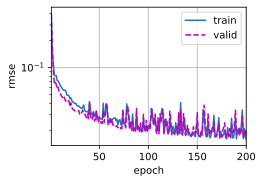

In [35]:
k, num_epochs, lr, weight_decay, batch_size = 5, 200, 0.0002, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')
d2l.plt.show()

In [36]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    preds = np.exp(preds) - 1
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission_613_Linear.csv', index=False)

训练log rmse：0.031656


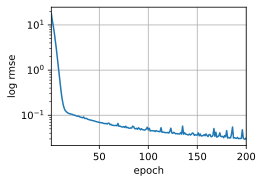

In [37]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)
d2l.plt.show()


https://github.com/Ming7959/Kaggle